# Covid Vaccines


In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno

In [125]:
by_manufacturer = pd.read_csv('data/country_vaccinations_by_manufacturer.csv')
country_vaccinations = pd.read_csv('data/country_vaccinations.csv')
continents = pd.read_csv('data/continents2.csv')

In [126]:
by_manufacturer.drop_duplicates()
by_manufacturer.head()

,location,date,vaccine,total_vaccinations
0,Austria,2021-01-08,Johnson&Johnson,0
1,Austria,2021-01-08,Moderna,0
2,Austria,2021-01-08,Oxford/AstraZeneca,0
3,Austria,2021-01-08,Pfizer/BioNTech,30958
4,Austria,2021-01-15,Johnson&Johnson,0


In [127]:
by_manufacturer.isna().sum()

location              0
date                  0
vaccine               0
total_vaccinations    0
dtype: int64

In [128]:
country_vaccinations.drop_duplicates()
country_vaccinations.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm...",World Health Organization,https://covid19.who.int/


In [129]:
country_vaccs = country_vaccinations.drop(['source_name', 'source_website', 'iso_code'], axis=1)
country_vaccs.head()

,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
0,Afghanistan,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
1,Afghanistan,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
2,Afghanistan,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
3,Afghanistan,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."
4,Afghanistan,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,"Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm..."


In [130]:
country_vaccs.isna().sum().sort_values(ascending=False)

people_fully_vaccinated                17259
people_fully_vaccinated_per_hundred    17259
daily_vaccinations_raw                 16649
people_vaccinated                      14507
people_vaccinated_per_hundred          14507
total_vaccinations                     13655
total_vaccinations_per_hundred         13655
daily_vaccinations                       240
daily_vaccinations_per_million           240
country                                    0
date                                       0
vaccines                                   0
dtype: int64

In [131]:
no_info_pfv = country_vaccs.groupby(['country']).people_fully_vaccinated.sum()
no_info_pfv_countries = []
for key, value in no_info_pfv.items():
    if value == 0:
        no_info_pfv_countries.append(key)
        
print('The countries missing data on \'people_fully vaccinated\' and \'people_fully vaccinated_per hundred\' are: ', no_info_pfv_countries)



The countries missing data on 'people_fully vaccinated' and 'people_fully vaccinated_per hundred' are:  ['Algeria', 'Central African Republic', 'Congo', "Cote d'Ivoire", 'Ethiopia', 'Libya', 'Madagascar', 'Nicaragua', 'Pitcairn', 'Saint Vincent and the Grenadines', 'Tonga', 'Tuvalu', 'Vanuatu']


In [132]:
print('We need daily vaccinations later so I will fill in the 240 missing values')
no_info_dv = country_vaccs.groupby(['country']).daily_vaccinations.sum()
no_info_dv_countries = []
for key, value in no_info_dv.items():
    if value == 0:
        no_info_dv_countries.append(key)
        
print('The countries missing data on daily vaccinations are: ', no_info_dv_countries)

We need daily vaccinations later so I will fill in the 240 missing values
The countries missing data on daily vaccinations are:  ['Bonaire Sint Eustatius and Saba', 'Pitcairn', 'Turkmenistan']


In [133]:
country_vaccs.daily_vaccinations_per_million.mean()

country_vaccs.tail()


,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
30792,Zimbabwe,2021-07-09,1464065.0,875182.0,588883.0,30487.0,15907.0,9.85,5.89,3.96,1070.0,Sinopharm/Beijing
30793,Zimbabwe,2021-07-10,NaN,NaN,NaN,NaN,16878.0,NaN,NaN,NaN,1136.0,Sinopharm/Beijing
30794,Zimbabwe,2021-07-11,1491397.0,895980.0,595417.0,NaN,18598.0,10.03,6.03,4.01,1251.0,Sinopharm/Beijing
30795,Zimbabwe,2021-07-12,1531868.0,926312.0,605556.0,40471.0,23205.0,10.31,6.23,4.07,1561.0,Sinopharm/Beijing
30796,Zimbabwe,2021-07-13,1575539.0,955656.0,619883.0,43671.0,27567.0,10.60,6.43,4.17,1855.0,Sinopharm/Beijing


In [134]:
# Bonaire Sint Eustatius and Saba pop = 25,987
# Pitcairn pop = 67
# Turkmenistan pop = 6,031,187

#daily_vaccinations_per_million_avg
dvpma = country_vaccs.daily_vaccinations_per_million.mean()

daily_vaccinations_per_pop = [dvpma * 25987/1000000, dvpma * 67/1000000, dvpma * 6031187/1000000]

for i in range (3):
    country_vaccs.loc[country_vaccs.country == no_info_dv_countries[i], 'daily_vaccinations_per_million'] = daily_vaccinations_per_million_avg
    country_vaccs.loc[country_vaccs.country == no_info_dv_countries[i], 'daily_vaccinations'] = daily_vaccinations_per_pop[i]


country_vaccs[country_vaccs.country == no_info_dv_countries[1]]




,country,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines
22196,Pitcairn,2021-06-15,47.0,47.0,NaN,NaN,0.229969,100.0,100.0,NaN,3433.048051,Oxford/AstraZeneca
22197,Pitcairn,2021-06-16,NaN,NaN,NaN,NaN,0.229969,NaN,NaN,NaN,3433.048051,Oxford/AstraZeneca
22198,Pitcairn,2021-06-17,NaN,NaN,NaN,NaN,0.229969,NaN,NaN,NaN,3433.048051,Oxford/AstraZeneca
22199,Pitcairn,2021-06-18,NaN,NaN,NaN,NaN,0.229969,NaN,NaN,NaN,3433.048051,Oxford/AstraZeneca
22200,Pitcairn,2021-06-19,NaN,NaN,NaN,NaN,0.229969,NaN,NaN,NaN,3433.048051,Oxford/AstraZeneca
22201,Pitcairn,2021-06-20,NaN,NaN,NaN,NaN,0.229969,NaN,NaN,NaN,3433.048051,Oxford/AstraZeneca
22202,Pitcairn,2021-06-21,47.0,47.0,NaN,NaN,0.229969,100.0,100.0,NaN,3433.048051,Oxford/AstraZeneca


In [135]:
continents.drop_duplicates()
continents.head() #not particularly useful for answering any of the questions

,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


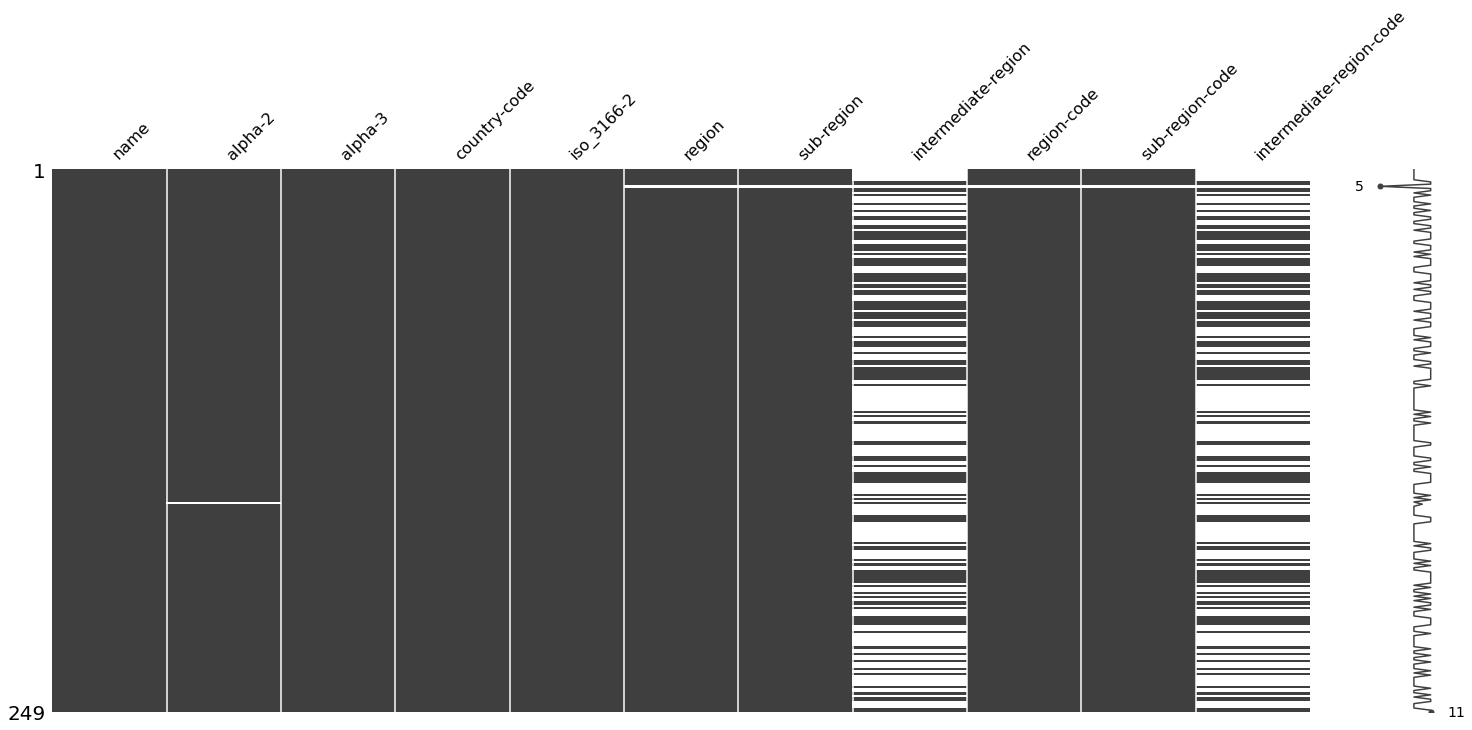

In [136]:
msno.matrix(continents)

### Which vaccines are used and which countries are they used in?

In [137]:
print("The vaccines used are ", by_manufacturer.vaccine.unique())

The vaccines used are  ['Johnson&Johnson' 'Moderna' 'Oxford/AstraZeneca' 'Pfizer/BioNTech'
 'Sinovac' 'CanSino' 'Sputnik V' 'Sinopharm/Beijing']


In [138]:
ordered_manufacturers = by_manufacturer.vaccine.value_counts(True).sort_values(ascending=False)
ordered_manufacturers

Pfizer/BioNTech       0.324271
Moderna               0.260057
Oxford/AstraZeneca    0.223696
Johnson&Johnson       0.147657
Sinovac               0.032714
Sputnik V             0.004752
CanSino               0.004531
Sinopharm/Beijing     0.002321
Name: vaccine, dtype: float64

In [139]:
print("The most popular manufacturer is", ordered_manufacturers.keys()[0])

The most popular manufacturer is Pfizer/BioNTech


#### Which countries use which vaccines?

In [140]:
country_vaccs.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmark', 'Djibouti', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Eswatini', 'Ethiopia',
       'Faeroe Islands', 'Fal

In [141]:
chosen_country = "Russia"
vax_by_country = country_vaccs[country_vaccs.country == chosen_country]


print(chosen_country, ' uses ', vax_by_country.vaccines.unique()[0])

Russia  uses  EpiVacCorona, Sputnik V


### Which country has vaccinated more people?

#### The countries with the most daily vaccinations

In [142]:
top_ten_daily_vaccs = country_vaccs.groupby(['country']).daily_vaccinations.sum().sort_values(ascending=False).head(10)

print(top_ten_daily_vaccs.keys(),"\n")

print("The country with the most daily vaccinations is ", top_ten_daily_vaccs.keys()[0])


Index(['China', 'India', 'United States', 'Brazil', 'Germany',
       'United Kingdom', 'England', 'Japan', 'France', 'Turkey'],
      dtype='object', name='country') 

The country with the most daily vaccinations is  China


### Which countries have vaccinated the largest percent of their population?

In [143]:
large_percent_vaxed = country_vaccs.groupby(['country']).total_vaccinations_per_hundred.sum().sort_values(ascending=False).head(10)

print(large_percent_vaxed.keys(), "\n")

print("The country which has vaccinated the largest percent of its population is", large_percent_vaxed.keys()[0])
##This is older data so this is not true anymore

Index(['Israel', 'United Arab Emirates', 'Gibraltar', 'Wales', 'Malta',
       'Scotland', 'England', 'United Kingdom', 'Chile', 'Bahrain'],
      dtype='object', name='country') 

The country which has vaccinated the largest percent of its population is Israel
